In [76]:
from scipy.stats import norm
f = lambda delta: norm.cdf(200,160,delta) - norm.cdf(120,160,delta)-0.8
i=1
while f(i) >= 0:
    i = i + 0.001
print(i)

31.213000000015164


In [88]:
from sympy import *
x = symbols('x')
f = symbols('f',cls=Function)
a,b,c,n = symbols('a b c n')
s = integrate(((a-b)*x-(b-c)*(n-x))*f(x),(x,0,n))+integrate((a-b)*n*f(x),(x,n,oo))
print((solve(diff(s,n,1))))

[{a: b - Integral((-b + c)*f(x), (x, 0, n))/Integral(f(x), (x, n, oo))}]


In [80]:
from sympy.integrals import integrate
from sympy import symbols,exp,oo
x1 = symbols('x1')
f1 = exp(-x1/8)/8
y1 = integrate(f1,(x1,0,1))
y2 = integrate(f1,(x1,1,2))
y3 = integrate(f1,(x1,2,3))
y4 = integrate(f1,(x1,3,oo))
qiwang = 1500*y1+2000*y2+2500*y3+3000*y4
print('期望为：',qiwang.n())

期望为： 2674.29348222349


In [1]:
import numpy as np
from scipy.stats import chi2
bins = np.arange(0,7)
mi = np.array([22,37,20,13,6,2,0])
n = mi.sum()
p = np.ones(7)/7
cha = (mi-n*p)**2/(n*p)
st = cha.sum()
bd = chi2.ppf(0.95,len(bins)-1)
print('统计量为：{}，临界值为：{}'.format(st,bd))

统计量为：72.34，临界值为：12.591587243743977


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
a = np.loadtxt('Pdata4_6_2.txt')
h = a[:,::2]
h = h.flatten()
mu = h.mean()
s = h.std(ddof=1)
print('均值为：{}，方差为：{}'.format(mu,s))
v,p=ss.kstest(h,'norm',(mu,s))
print('统计量和P值为：',[v,p])

均值为：170.25，方差为：5.401786086961694
统计量和P值为： [0.07534426415818629, 0.594586546199326]


In [3]:
import numpy as np
import statsmodels.api as sa
y = np.loadtxt('xiti_4_21.txt')
y = y.T.flatten()
b = np.arange(1,8)
x = np.tile(b,(10,1)).T.flatten()
d = {'x':x,'y':y}
model = sa.formula.ols('y~C(x)',d).fit()
nvant = sa.stats.anova_lm(model)
print(nvant)

            df    sum_sq   mean_sq         F    PR(>F)
C(x)       6.0  0.124737  0.020790  5.660069  0.000095
Residual  63.0  0.231400  0.003673       NaN       NaN


拟合的多项式为：0.9880519420637354*x+(-0.10404608618970992)


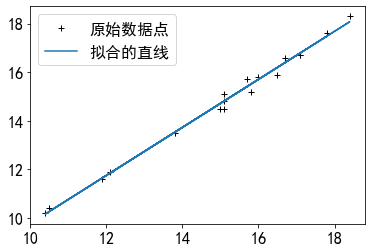

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = [17.1,10.5,13.8,15.7,11.9,10.4,15.0,16.0,17.8,
     15.8,15.1,12.1,18.4,17.1,16.7,16.5,15.1,15.1]
y = [16.7,10.4,13.5,15.7,11.6,10.2,14.5,15.8,17.6,
     15.2,14.8,11.9,18.3,16.7,16.6,15.9,15.1,14.5]
plt.plot(x,y,'+k',label = '原始数据点')
p = np.polyfit(x,y,deg=1)
print('拟合的多项式为：{}*x+({})'.format(p[0],p[1]))
plt.rc('font',size=16)
plt.rc('font',family='SimHei')
plt.plot(x,np.polyval(p,x),label='拟合的直线')
plt.legend()
plt.savefig('figure4_6.png',dpi=500)
plt.show()

In [3]:
import statsmodels.api as sm
x = [17.1,10.5,13.8,15.7,11.9,10.4,15.0,16.0,17.8,
     15.8,15.1,12.1,18.4,17.1,16.7,16.5,15.1,15.1]
y = [16.7,10.4,13.5,15.7,11.6,10.2,14.5,15.8,17.6,
     15.2,14.8,11.9,18.3,16.7,16.6,15.9,15.1,14.5]
df = {'x':x,'y':y}
res = sm.formula.ols('y~x',data=df).fit()
print(res.summary(),'\n')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2312.
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           9.81e-19
Time:                        08:40:57   Log-Likelihood:                 4.3323
No. Observations:                  18   AIC:                            -4.665
Df Residuals:                      16   BIC:                            -2.884
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1040      0.312     -0.333      0.7

d:\venv\suanfa\suanfa\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [8]:
import statsmodels.api as sm
x = [17.1,10.5,13.8,15.7,11.9,10.4,15.0,16.0,17.8,
     15.8,15.1,12.1,18.4,17.1,16.7,16.5,15.1,15.1]
y = [16.7,10.4,13.5,15.7,11.6,10.2,14.5,15.8,17.6,
     15.2,14.8,11.9,18.3,16.7,16.6,15.9,15.1,14.5]
X=sm.add_constant(x)
md = sm.OLS(y,X).fit()
print(md.params,'\n--------------------------------------------------------------\n')
print(md.summary2())

[-0.10404609  0.98805194] 
--------------------------------------------------------------

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.993   
Dependent Variable: y                AIC:                -4.6647 
Date:               2020-08-09 08:42 BIC:                -2.8840 
No. Observations:   18               Log-Likelihood:     4.3323  
Df Model:           1                F-statistic:        2312.   
Df Residuals:       16               Prob (F-statistic): 9.81e-19
R-squared:          0.993            Scale:              0.040702
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const      -0.1040     0.3120   -0.3335   0.7431   -0.7655   0.5574
x1          0.9881     0.0205   48.0822   0.0000    0.9445   1.0316
----------------------------------------------------------